In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import levene
from sklearn import preprocessing
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("House_Rent_Dataset.csv")
df

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent


In [3]:
import pandas as pd

class SystematicSampling:
    def __init__(self, population):
        self.df_population = population
        self.selected_sampling = []

    def sample(self, k, start, variable, summary_table=True, data_visual=True):
        N = len(self.df_population)
        indices = [list(range((start + i) % k, N, k)) for i in range(k)]
        systematic_samples = []

        sample_means = []
        sample_std_devs = []
        total_estimates = []

        for i, index_list in enumerate(indices, start=start):
            samples = self.df_population.iloc[index_list]
            self.selected_sampling.append(samples)  # Store the selected samples
            systematic_samples.append(samples)
            
            # Calculate mean and standard deviation for each sample
            mean = samples[variable].mean()
            std_dev = samples[variable].std()
            sample_means.append(mean)
            sample_std_devs.append(std_dev)
            
            total_estimate = mean * N
            total_variance_estimate = std_dev ** 2  # Corrected calculation
            
            total_estimates.append(total_estimate)

            # Display the systematic sample data if data_visual is True
            if data_visual:
                print(f'Systematic Sample {i}:')
                print(samples)
                print(f'Mean of {variable}: {mean}')
                print(f'Standard Deviation of {variable}: {std_dev}')
                print()

        df_summary = pd.DataFrame({
            'Systematic Sample': range(0, k),
            'Mean': sample_means,
            'Standard Deviation': sample_std_devs,
            'Total Estimate': total_estimates
        })

        if summary_table:
            print("Summary Table:")
            print(df_summary)
            print(f'\nMean of Means: {sum(sample_means) / len(sample_means)}')
            print(f'Mean of Standard Deviations: {sum(sample_std_devs) / len(sample_std_devs)}')
            print(f'Sum of Total Estimates: {sum(total_estimates)}')

            
    def calculate_variance(self, k, want_variable=None, plot = True):
        N = len(self.df_population)
        total_squared_deviations = 0

        for i, samples in enumerate(self.selected_sampling, start=1):
            if want_variable is not None:
                samples = samples[want_variable]
                
            mean = samples.mean()  # Calculate mean directly
            deviations_squared = ((samples - mean) ** 2).sum()  # Calculate deviations directly
            total_squared_deviations += deviations_squared

            print(f"Total {i} -> {deviations_squared}")

        print(f"Total sum of squared deviations: {total_squared_deviations}")
        
        n = N / k
        sample_variance = total_squared_deviations / ((k) * (n-1))
        std_2 = self.df_population[want_variable].std()**2
        a = (((N-1)/N)*(std_2)) - (((k*(n-1)*sample_variance)/N))
        total_variance_estimates = N * N * a
        print(f"Total Variance Estimate: {total_variance_estimates}")

        if plot:
            plt.figure(figsize=(12, 6))
            data = [samples[want_variable].tolist() for samples in self.selected_sampling]
            plt.boxplot(data, 
                        labels=[f'Systematic Sample {i}' for i in range(len(self.selected_sampling))],
                        patch_artist=True,  # Kutuları renklendirme
                        boxprops=dict(facecolor='lightblue', edgecolor='black'),  # Kutu rengi ve kenarlık
                        flierprops=dict(marker='o', markerfacecolor='k', markersize=4, linestyle='none'))  # Outlier'lar
            plt.xlabel('Systematic Samples')
            plt.ylabel('Values')
            plt.title('Boxplots of Systematic Samples')
            plt.xticks(rotation=90)
            plt.grid(axis='y')
            plt.show()      


In [4]:
population = df[df["City"] == "Kolkata"]
systematic_sampler = SystematicSampling(population)
systematic_sampler.sample(k=4, start=0,variable="Rent",summary_table=True,data_visual=False)

Summary Table:
   Systematic Sample          Mean  Standard Deviation  Total Estimate
0                  0  11855.312977        17165.592803       6212184.0
1                  1  12765.839695         9854.878822       6689300.0
2                  2  11312.977099         7876.121624       5928000.0
3                  3  10646.564885         6542.327247       5578800.0

Mean of Means: 11645.173664122138
Mean of Standard Deviations: 10359.730124050318
Sum of Total Estimates: 24408284.0


Total 1 -> 38305484918.16793
Total 2 -> 12625422757.633587
Total 3 -> 8064327938.931298
Total 4 -> 5564265954.198473
Total sum of squared deviations: 64559501568.93128
Total Variance Estimate: 165269005922.94803


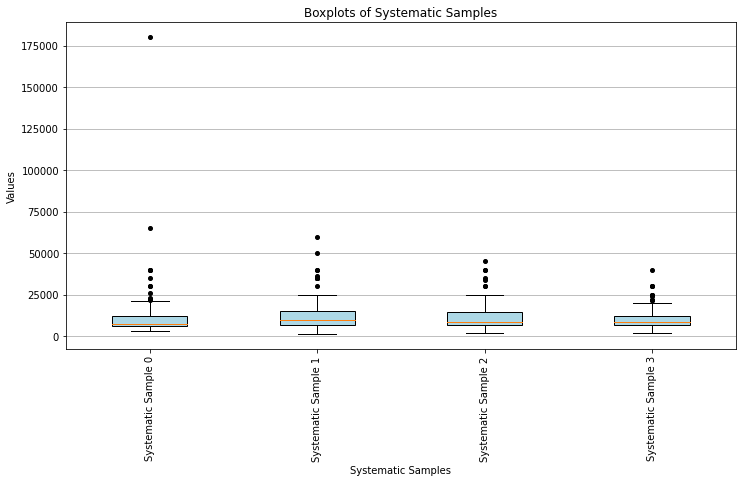

In [5]:
systematic_sampler.calculate_variance(k=4,want_variable="Rent",plot=True)